In [ ]:
#*****************************************************************
#If you have any questions please use Q&A section on www.udemy.com
#Author - jaro.algo@icloud.com
#*****************************************************************

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use('ggplot')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2015-01-01', end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995
...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005


In [9]:
def Bollinger_bands(df, window, std_mult):
    df['rolling_mean'] = df['Adj Close'].rolling(window).mean()
    df['rolling_std'] = df['Adj Close'].rolling(window).std()
    df['upper_band'] = df['rolling_mean'] + (df['rolling_std'] * std_mult)
    df['lower_band'] = df['rolling_mean'] - (df['rolling_std'] * std_mult)
    return df

In [10]:
df = Bollinger_bands(df, 14, 2)
df

,High,Low,Open,Close,Volume,Adj Close,rolling_mean,rolling_std,upper_band,lower_band
Date,,,,,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,NaN,NaN,NaN,NaN
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,NaN,NaN,NaN,NaN
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,NaN,NaN,NaN,NaN
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,NaN,NaN,NaN,NaN
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000,373.795715,31.742483,437.280681,310.310750
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002,380.979287,32.529078,446.037444,315.921130
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005,387.728572,32.255567,452.239706,323.217438


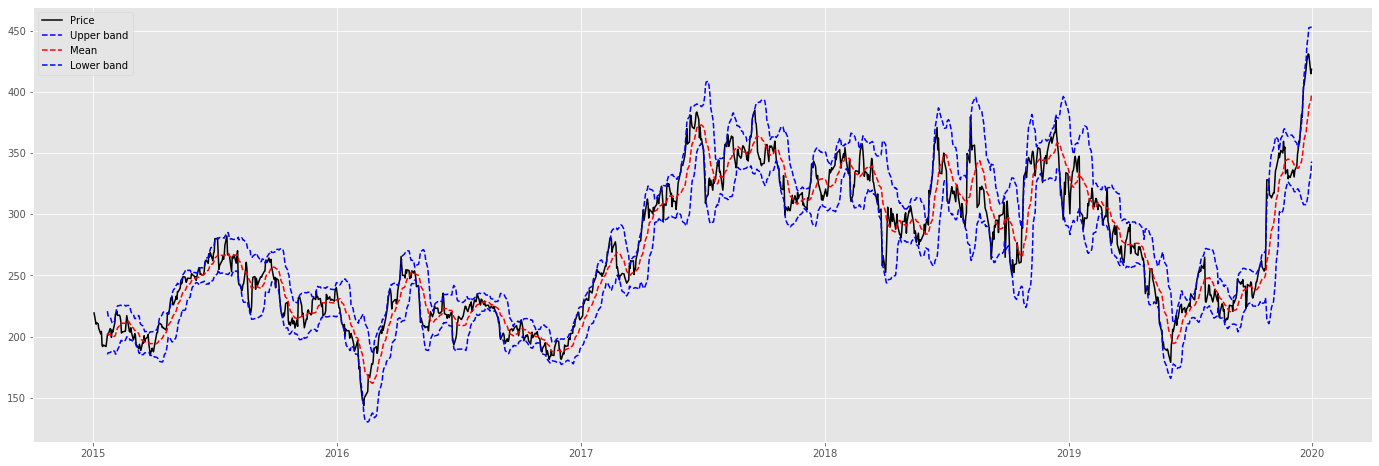

In [13]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], label = 'Price', color = 'black')
plt.plot(df['upper_band'], label = 'Upper band', color = 'blue', ls = '--')
plt.plot(df['rolling_mean'], label = 'Mean', color = 'red', ls = '--')
plt.plot(df['lower_band'], label = 'Lower band', color = 'blue', ls = '--')
plt.legend()